In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from mpl_toolkits import mplot3d #plotting in 3d
from matplotlib import cm #color polt

In [2]:
#implement analytical solution:
def poisson_source(x,y,Lx,Ly):
    #want to get a 2d array from a 1d array
    #use meshgrid to do this
    #meshgrid will take (2) 1d arrays and give back (2) 2d arrays
    X,Y=numpy.meshgrid(x,y)
    b=(-2*(numpy.pi/2)**2)*(numpy.sin((numpy.pi*X)/Lx))*(numpy.cos((numpy.pi*Y)/Ly))
    #use pi/L
    return b

In [3]:
nx,ny=41,41
xmin, xmax = 0.0, 1.0  # domain limits in the x direction
ymin, ymax = -0.5, 0.5  # domain limits in the y direction
Lx=xmax-xmin
Ly=ymax-ymin
dx = Lx / (nx - 1)  # grid spacing in the x direction
dy = Ly / (ny - 1)  # grid spacing in the y direction

x=numpy.linspace(xmin,xmax,num=nx)
y=numpy.linspace(ymin,ymax,num=ny)
ua=poisson_source(x,y,Lx,Ly)

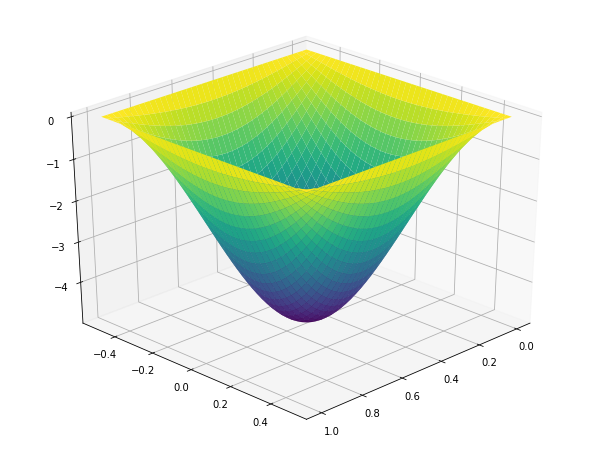

In [4]:
def plot_3d(x,y,u):
    fig=pyplot.figure(figsize=(8.0,6.0))
    ax=mplot3d.Axes3D(fig)
    X,Y=numpy.meshgrid(x,y)
    ax.plot_surface(X,Y,u,cmap=cm.viridis)
    ax.view_init(elev=30.0, azim=45.0)

    
plot_3d(x,y,ua)

In [5]:
from helper import l2_norm

In [6]:
def poisson_2d_jacobi(p0, b, dx, dy, maxiter=20000, rtol=1e-6):
    p=p0.copy()
    conv = []  # convergence history
    diff = rtol + 1.0  # initial difference
    ite = 0  # iteration index
    while diff > rtol and ite < maxiter:
        pn = p.copy()
        p[1:-1, 1:-1] = (((pn[1:-1, :-2] + pn[1:-1, 2:]) * dy**2 +
                          (pn[:-2, 1:-1] + pn[2:, 1:-1]) * dx**2 -
                          b[1:-1, 1:-1] * dx**2 * dy**2) /
                         (2.0 * (dx**2 + dy**2)))
        # Dirichlet boundary conditions at automatically enforced.
        # Compute and record the relative L2-norm of the difference.
        diff = l2_norm(p, pn)
        conv.append(diff)
        ite += 1
    return p, ite, conv

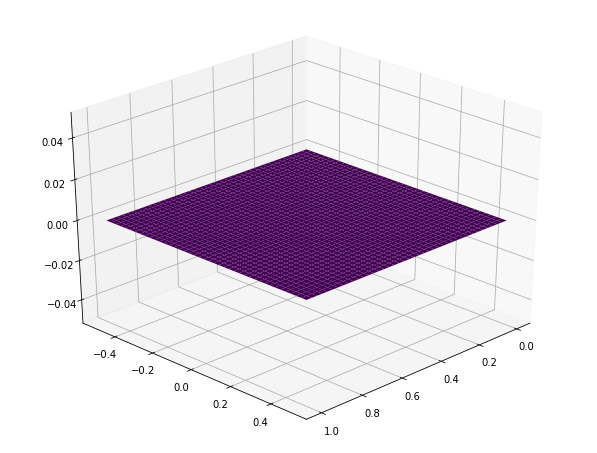

In [7]:
# Set the initial conditions.
p0 = numpy.zeros((ny, nx))

# Compute the source term.
b = poisson_source(x, y, Lx, Ly)

# Plot the initial scalar field.
plot_3d(x, y, p0)

In [8]:
# Compute the solution using Jacobi relaxation method.
p, ites, conv = poisson_2d_jacobi(p0, b, dx, dy, rtol=2e-7)
print('Jacobi relaxation: {} iterations '.format(ites) +
      'to reach a relative difference of {}'.format(conv[-1]))

Jacobi relaxation: 3125 iterations to reach a relative difference of 1.9958631078740742e-07


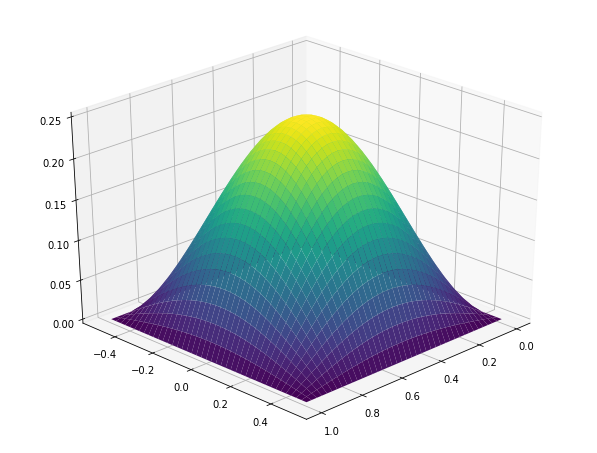

In [9]:
# Plot the solution.
plot_3d(x, y, p)